# Imoprt Libraries

In [1]:
# Import necessary libraries

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For static visualizations
import seaborn as sns  # For advanced statistical visualizations
import plotly.express as px  # For interactive plots (high-level)
import plotly.graph_objects as go  # For customizable interactive plots
from sklearn.preprocessing import StandardScaler  # For feature standardization
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels
from sklearn.preprocessing import MinMaxScaler  # For feature scaling to range [0, 1]
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets


In [2]:
data =pd.read_csv('/kaggle/input/data-clean/data_Cleaing.csv')

# Data analysis 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   encounter_id                101766 non-null  int64  
 1   patient_nbr                 101766 non-null  int64  
 2   race                        101766 non-null  object 
 3   gender                      101766 non-null  object 
 4   age                         101766 non-null  float64
 5   admission_type_id           101766 non-null  int64  
 6   discharge_disposition_id    101766 non-null  int64  
 7   admission_source_id         101766 non-null  int64  
 8   payer_code                  101766 non-null  object 
 9   medical_specialty           101766 non-null  object 
 10  num_lab_procedures          101766 non-null  float64
 11  num_procedures              101766 non-null  int64  
 12  num_medications             101766 non-null  float64
 13  number_outpati

In [4]:
data.head()

encounter_id  patient_nbr             race  gender   age  \
0       2278392      8222157        Caucasian  Female   0.0   
1        149190     55629189        Caucasian  Female  10.0   
2         64410     86047875  AfricanAmerican  Female  20.0   
3        500364     82442376        Caucasian    Male  30.0   
4         16680     42519267        Caucasian    Male  40.0   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

  payer_code         medical_specialty  ...  insulin  glyburide-metformin  \
0         MC  Pediatrics-Endocrinology  ...       No                   No   
1         MC          InternalMedicine  ...       Up                   No   
2         MC          InternalMedicine  ...       No                   No   
3         MC          InternalMedicine  ...       Up                   No   
4         MC          InternalMedicine  ...   Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone change diabetesMed encoded_readmitted  \
0                      No     No          No                  0   
1                      No     Ch         Yes                  1   
2                      No     No         Yes                  0   
3                      No     Ch         Yes                  0   
4                      No     Ch         Yes                  0   

  time_diagnoses_interaction  
0                   0.000000  
1                   1.384615  
2                   0.461538  
3                   0.538462  
4                   0.000000  

[5 rows x 48 columns]

In [5]:
data.nunique()

encounter_id                  101766
patient_nbr                    71518
race                               5
gender                             3
age                               10
admission_type_id                  8
discharge_disposition_id          26
admission_source_id               17
payer_code                        17
medical_specialty                 72
num_lab_procedures               118
num_procedures                     7
num_medications                   75
number_outpatient                 39
number_emergency                  33
number_inpatient                  21
diag_1                           716
diag_2                           748
diag_3                           789
max_glu_serum                      4
A1Cresult                          4
metformin                          4
repaglinide                        4
nateglinide                        4
chlorpropamide                     4
glimepiride                        4
acetohexamide                      2
g

## Display information about Target feature [encoded_readmitted].

In [6]:
data.groupby('encoded_readmitted')['encoded_readmitted'].count()

encoded_readmitted
0    54864
1    35545
2    11357
Name: encoded_readmitted, dtype: int64

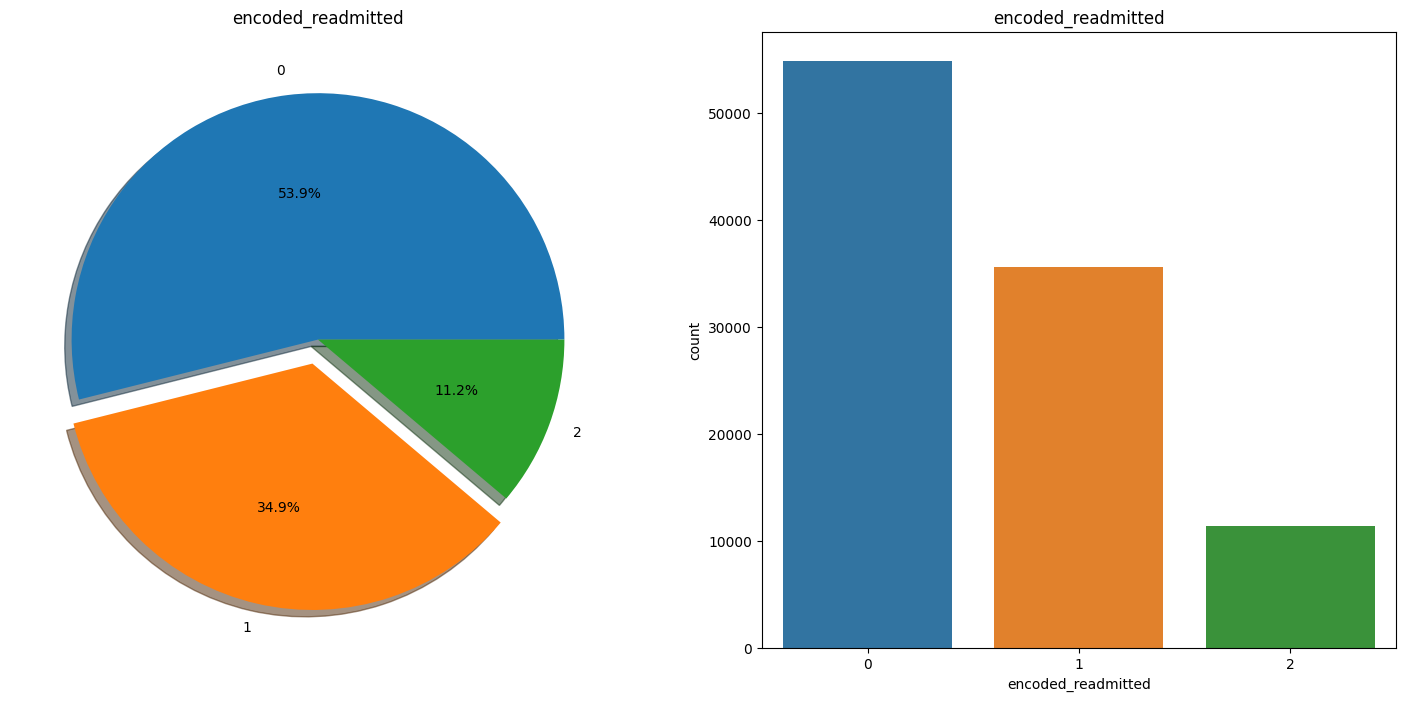

In [7]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Get value counts of 'encoded_readmitted'
value_counts = data['encoded_readmitted'].value_counts()

# Dynamically create the 'explode' array based on the number of unique values
explode = [0.1 if i == 1 else 0 for i in range(len(value_counts))]  # Adjust this as needed

# Pie chart
value_counts.plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('encoded_readmitted')
ax[0].set_ylabel('')

# Count plot (bar plot)
sns.countplot(x='encoded_readmitted', data=data, ax=ax[1])
ax[1].set_title('encoded_readmitted')

plt.show()


we have 3 classes from the Target feature. 0 with higher percantage and 3 is the lower one.
## Display relation between target and [encounter_id, patient_nbr, race, gender, age]

In [8]:
data.groupby('race')['encoded_readmitted'].count()

race
AfricanAmerican    19210
Asian                641
Caucasian          78372
Hispanic            2037
Other               1506
Name: encoded_readmitted, dtype: int64

In [9]:
data.groupby('gender')['encoded_readmitted'].count()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: encoded_readmitted, dtype: int64

In [10]:
# display the gender for each readmitted in each race
pd.crosstab([data.gender,data.encoded_readmitted],data.race,margins=True).style.background_gradient(cmap='summer_r')

In [11]:
data.groupby('age')['encoded_readmitted'].count()

age
0.0       161
10.0      691
20.0     1657
30.0     3775
40.0     9685
50.0    17256
60.0    22483
70.0    26068
80.0    17197
90.0     2793
Name: encoded_readmitted, dtype: int64

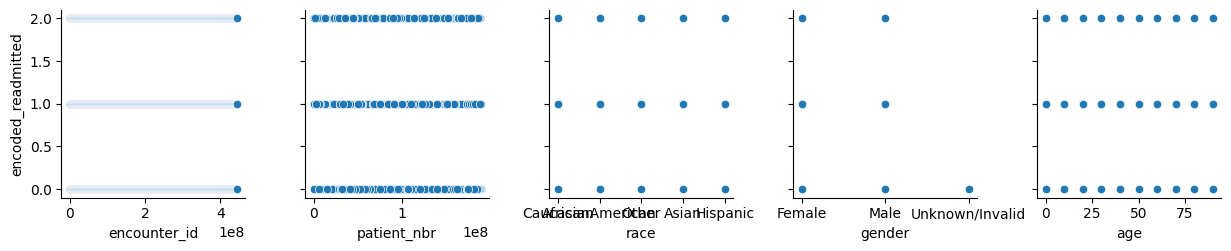

In [12]:
sns.pairplot(data=data,
                  y_vars='encoded_readmitted',
                  x_vars=['encounter_id', 'patient_nbr', 'race', 'gender', 'age'])

## drop 'encounter_id', 'patient_nbr' don't have relation with target column ,encode race and gender columns using labelencoder.

In [13]:
# drop
data.drop(['encounter_id','patient_nbr'], axis = 1, inplace = True)
# encode
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['race'] = encoder.fit_transform(data['race'])

## Display Relation between target and [admission_type_id, discharge_disposition_id, admission_source_id, payer_code, medical_specialty]

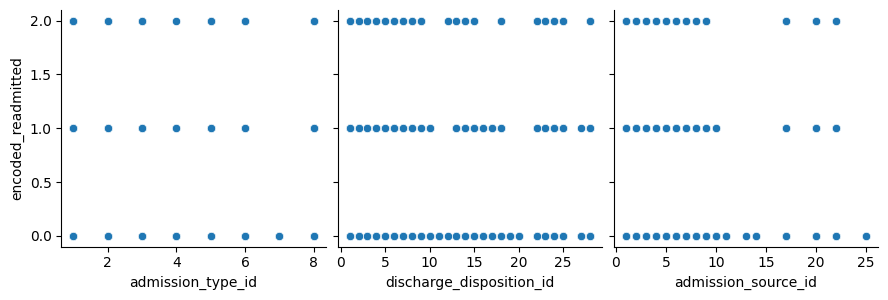

In [17]:
sns.pairplot(data=data,
                  y_vars='encoded_readmitted',
                  x_vars=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'],height=3)

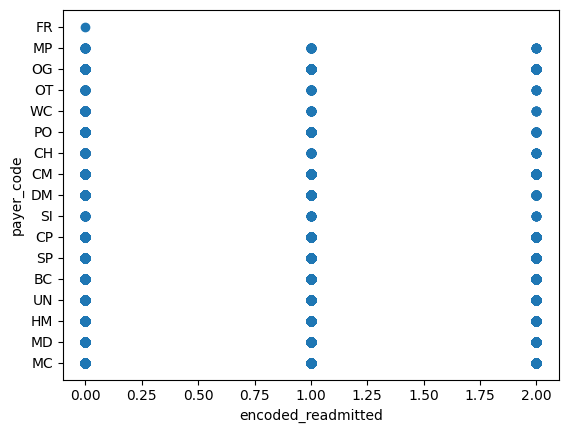

In [18]:
plt.scatter(data['encoded_readmitted'],data['payer_code'] )

plt.xlabel('encoded_readmitted')
plt.ylabel('payer_code')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


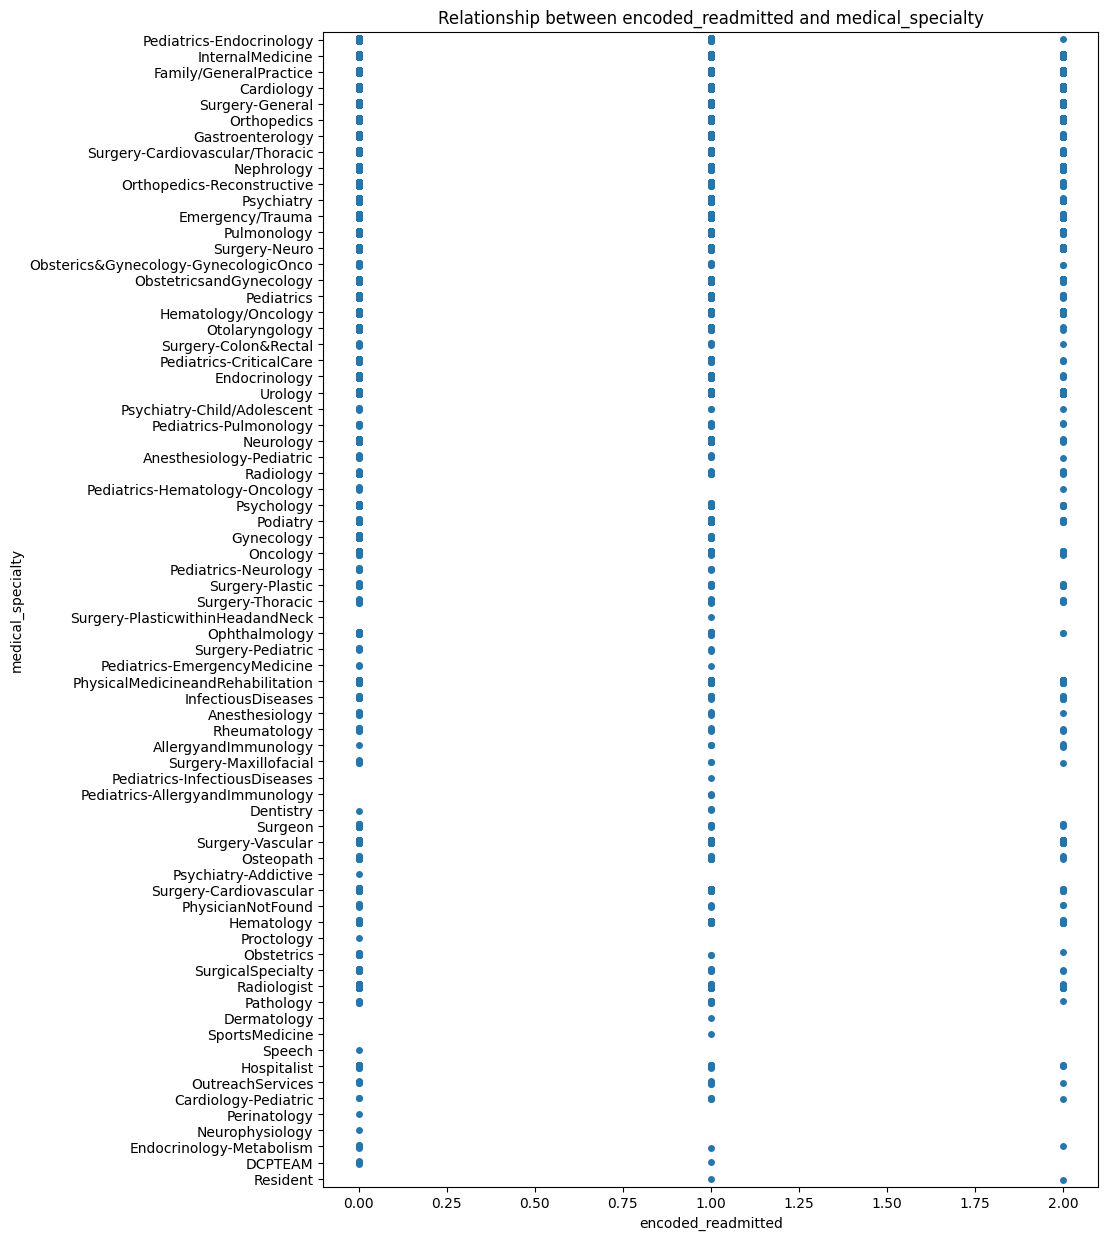

In [19]:
plt.figure(figsize=(10, 15))
sns.stripplot(x='encoded_readmitted', y='medical_specialty', data=data)
plt.title('Relationship between encoded_readmitted and medical_specialty')
plt.xlabel('encoded_readmitted')
plt.ylabel('medical_specialty')
plt.show()

In [20]:
# drop this columns - timeinhospital replace before by feature engineering - others don't have relation 
l_col=['admission_type_id', 'discharge_disposition_id', 'admission_source_id','payer_code', 'medical_specialty']
data.drop(l_col, axis = 1, inplace = True)

## Display [num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient]

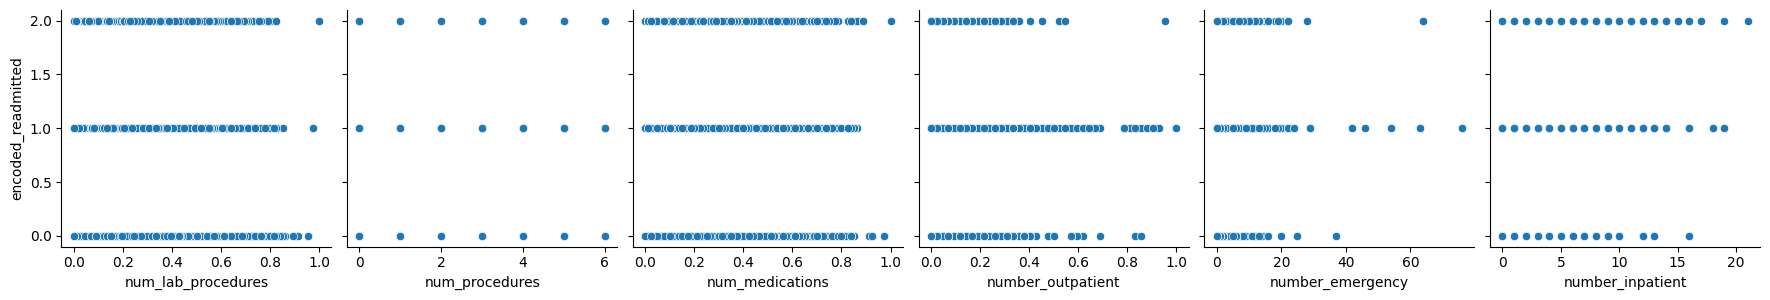

In [21]:
l_col=['num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']
sns.pairplot(data=data,
                  y_vars='encoded_readmitted',
                  x_vars=l_col,height=3)

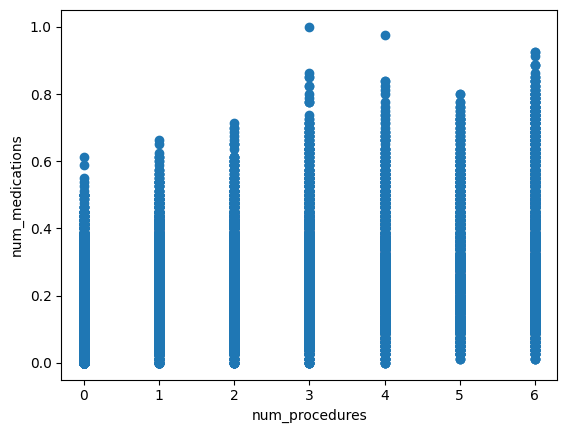

In [22]:
plt.scatter(data['num_procedures'],data['num_medications'])

plt.xlabel('num_procedures')
plt.ylabel('num_medications')
plt.show()

Their is a relation between num_procedures and num_medications

In [23]:
data['number_emergency'].unique()

array([ 0,  1,  2,  4,  3,  9,  5,  7,  6,  8, 22, 25, 10, 13, 42, 16, 11,
       28, 15, 14, 18, 12, 21, 20, 19, 46, 76, 37, 64, 63, 54, 24, 29])

In [24]:
#drop this for no relation between them and target
data.drop(['num_lab_procedures', 'number_outpatient'], axis = 1, inplace = True)

In [25]:
# Create the scatter matrix
fig = px.scatter_matrix(data, dimensions=data.select_dtypes(include=['float64', 'int64']).columns)

# Change the size of the plot
fig.update_layout(
    width=1500,  # Width of the plot in pixels
    height=1500   # Height of the plot in pixels
)

# Display the plot
fig.show()

## Display[diag_1, diag_2, diag_3]

In [26]:
#Diagnosis codes (ICD-9)
l_col=['diag_1', 'diag_2', 'diag_3']
for i in l_col:
    x=data[i].unique()
    print(x)

['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996'
 '277' '584' '462' '473' '411' '174' '486' '998' '511' '432' '626' '295'
 '196' '250.6' '618' '182' '845' '423' '808' '250.4' '722' '403' '250.11'
 '784' '707' '440' '151' '715' '997' '198' '564' '812' '38' '590' '556'
 '578' '250.32' '433' 'V58' '569' '185' '536' '255' '250.13' '599' '558'
 '574' '491' '560' '244' '250.03' '577' '730' '188' '824' '250.8' '332'
 '562' '291' '296' '510' '401' '263' '438' '70' '250.02' '493' '642' '625'
 '571' '738' '593' '250.42' '807' '456' '446' '575' '250.41' '820' '515'
 '780' '250.22' '995' '235' '250.82' '721' '787' '162' '724' '282' '514'
 'V55' '281' '250.33' '530' '466' '435' '250.12' 'V53' '789' '566' '822'
 '191' '557' '733' '455' '711' '482' '202' '280' '553' '225' '154' '441'
 '250.81' '349' '962' '592' '507' '386' '156' '200' '728' '348' '459'
 '426' '388' '607' '337' '82' '531' '596' '288' '656' '5

In [27]:
import re

# Define the categories and the regex patterns for each category
category_mapping = {
    '1': r'^1',  # Codes starting with 1
    '2': r'^2',  # Codes starting with 2
    '3': r'^3',  # Codes starting with 3
    '4-5': r'^[45]',  # Codes starting with 4 or 5
    '6-7': r'^[67]',  # Codes starting with 6 or 7
    '8-9': r'^[89]',  # Codes starting with 8 or 9
    'other': r'^V'  # Codes starting with V (special codes)
}

# Function to categorize a diagnosis code
def categorize_diag_code(code):
    for category, pattern in category_mapping.items():
        if re.match(pattern, code):
            return category
    return 'other'  # Default to 'other' if no match is found

# Apply the categorization function to each diagnosis column
data['diag_1_category'] = data['diag_1'].apply(categorize_diag_code)
data['diag_2_category'] = data['diag_2'].apply(categorize_diag_code)
data['diag_3_category'] = data['diag_3'].apply(categorize_diag_code)

data

race  gender   age  num_procedures  num_medications  number_emergency  \
0          2       0   0.0               0           0.0000                 0   
1          2       0  10.0               0           0.2125                 0   
2          0       0  20.0               5           0.1500                 0   
3          2       1  30.0               1           0.1875                 0   
4          2       1  40.0               0           0.0875                 0   
...      ...     ...   ...             ...              ...               ...   
101761     0       1  70.0               0           0.1875                 0   
101762     0       0  80.0               3           0.2125                 0   
101763     2       1  70.0               0           0.1000                 0   
101764     2       0  80.0               2           0.2500                 0   
101765     2       1  70.0               3           0.0250                 0   

        number_inpatient  diag_1  diag_2 diag_3  ... glimepiride-pioglitazone  \
0                      0  250.83     276    250  ...                       No   
1                      0     276  250.01    255  ...                       No   
2                      1     648     250    V27  ...                       No   
3                      0       8  250.43    403  ...                       No   
4                      0     197     157    250  ...                       No   
...                  ...     ...     ...    ...  ...                      ...   
101761                 0  250.13     291    458  ...                       No   
101762                 1     560     276    787  ...                       No   
101763                 0      38     590    296  ...                       No   
101764                 1     996     285    998  ...                       No   
101765                 0     530     530    787  ...                       No   

       metformin-rosiglitazone metformin-pioglitazone change diabetesMed  \
0                           No                     No     No          No   
1                           No                     No     Ch         Yes   
2                           No                     No     No         Yes   
3                           No                     No     Ch         Yes   
4                           No                     No     Ch         Yes   
...                        ...                    ...    ...         ...   
101761                      No                     No     Ch         Yes   
101762                      No                     No     No         Yes   
101763                      No                     No     Ch         Yes   
101764                      No                     No     Ch         Yes   
101765                      No                     No     No          No   

       encoded_readmitted time_diagnoses_interaction diag_1_category  \
0                       0                   0.000000               2   
1                       1                   1.384615               2   
2                       0                   0.461538             6-7   
3                       0                   0.538462             8-9   
4                       0                   0.000000               1   
...                   ...                        ...             ...   
101761                  1                   1.384615               2   
101762                  0                   2.769231             4-5   
101763                  0                   0.000000               3   
101764                  0                   6.230769             8-9   
101765                  0                   3.461538             4-5   

       diag_2_category diag_3_category  
0                    2               2  
1                    2               2  
2                    2           other  
3                    2             4-5  
4                    1               2  
...                ...             ...

In [28]:
# now drop the old columns
data.drop(l_col, axis = 1, inplace = True)
#encode the new columns
data['diag_1_category'] = encoder.fit_transform(data['diag_1_category'])
data['diag_2_category'] = encoder.fit_transform(data['diag_2_category'])
data['diag_3_category'] = encoder.fit_transform(data['diag_3_category'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   race                        101766 non-null  int64  
 1   gender                      101766 non-null  int64  
 2   age                         101766 non-null  float64
 3   num_procedures              101766 non-null  int64  
 4   num_medications             101766 non-null  float64
 5   number_emergency            101766 non-null  int64  
 6   number_inpatient            101766 non-null  int64  
 7   max_glu_serum               101766 non-null  object 
 8   A1Cresult                   101766 non-null  object 
 9   metformin                   101766 non-null  object 
 10  repaglinide                 101766 non-null  object 
 11  nateglinide                 101766 non-null  object 
 12  chlorpropamide              101766 non-null  object 
 13  glimepiride   

## Display information about other columns

In [30]:
# grouping all medications into less groups by taking the max from them
data['sulfonylureas'] = data[['glimepiride', 'glipizide', 'glyburide', 'tolbutamide']].max(axis=1)
data['biguanides'] = data[['metformin', 'glyburide-metformin', 'glipizide-metformin']].max(axis=1)
data['thiazolidinediones'] = data[['pioglitazone', 'rosiglitazone', 'glimepiride-pioglitazone', 'metformin-pioglitazone', 'metformin-rosiglitazone']].max(axis=1)
data['meglitinides'] = data[['repaglinide', 'nateglinide']].max(axis=1)
data['alpha_glucosidase_inhibitors'] = data[['acarbose', 'miglitol']].max(axis=1)
data['insulin'] = data[['insulin']].max(axis=1)
data['other_combination_therapies'] = data[['examide', 'citoglipton', 'troglitazone', 'tolazamide','chlorpropamide','acetohexamide']].max(axis=1)

In [31]:
#drop the other columns
l_cols=['examide', 'citoglipton', 'troglitazone', 'tolazamide',
        'chlorpropamide','acetohexamide',
        'acarbose', 'miglitol','repaglinide', 
        'nateglinide','pioglitazone', 'rosiglitazone', 'glimepiride-pioglitazone', 
        'metformin-pioglitazone', 'metformin-rosiglitazone','metformin', 'glyburide-metformin',
        'glipizide-metformin','glimepiride', 'glipizide', 'glyburide', 'tolbutamide']
data.drop(l_cols, axis = 1, inplace = True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   race                          101766 non-null  int64  
 1   gender                        101766 non-null  int64  
 2   age                           101766 non-null  float64
 3   num_procedures                101766 non-null  int64  
 4   num_medications               101766 non-null  float64
 5   number_emergency              101766 non-null  int64  
 6   number_inpatient              101766 non-null  int64  
 7   max_glu_serum                 101766 non-null  object 
 8   A1Cresult                     101766 non-null  object 
 9   insulin                       101766 non-null  object 
 10  change                        101766 non-null  object 
 11  diabetesMed                   101766 non-null  object 
 12  encoded_readmitted            101766 non-nul

## encode all the categorical data and using heat map to display the relations

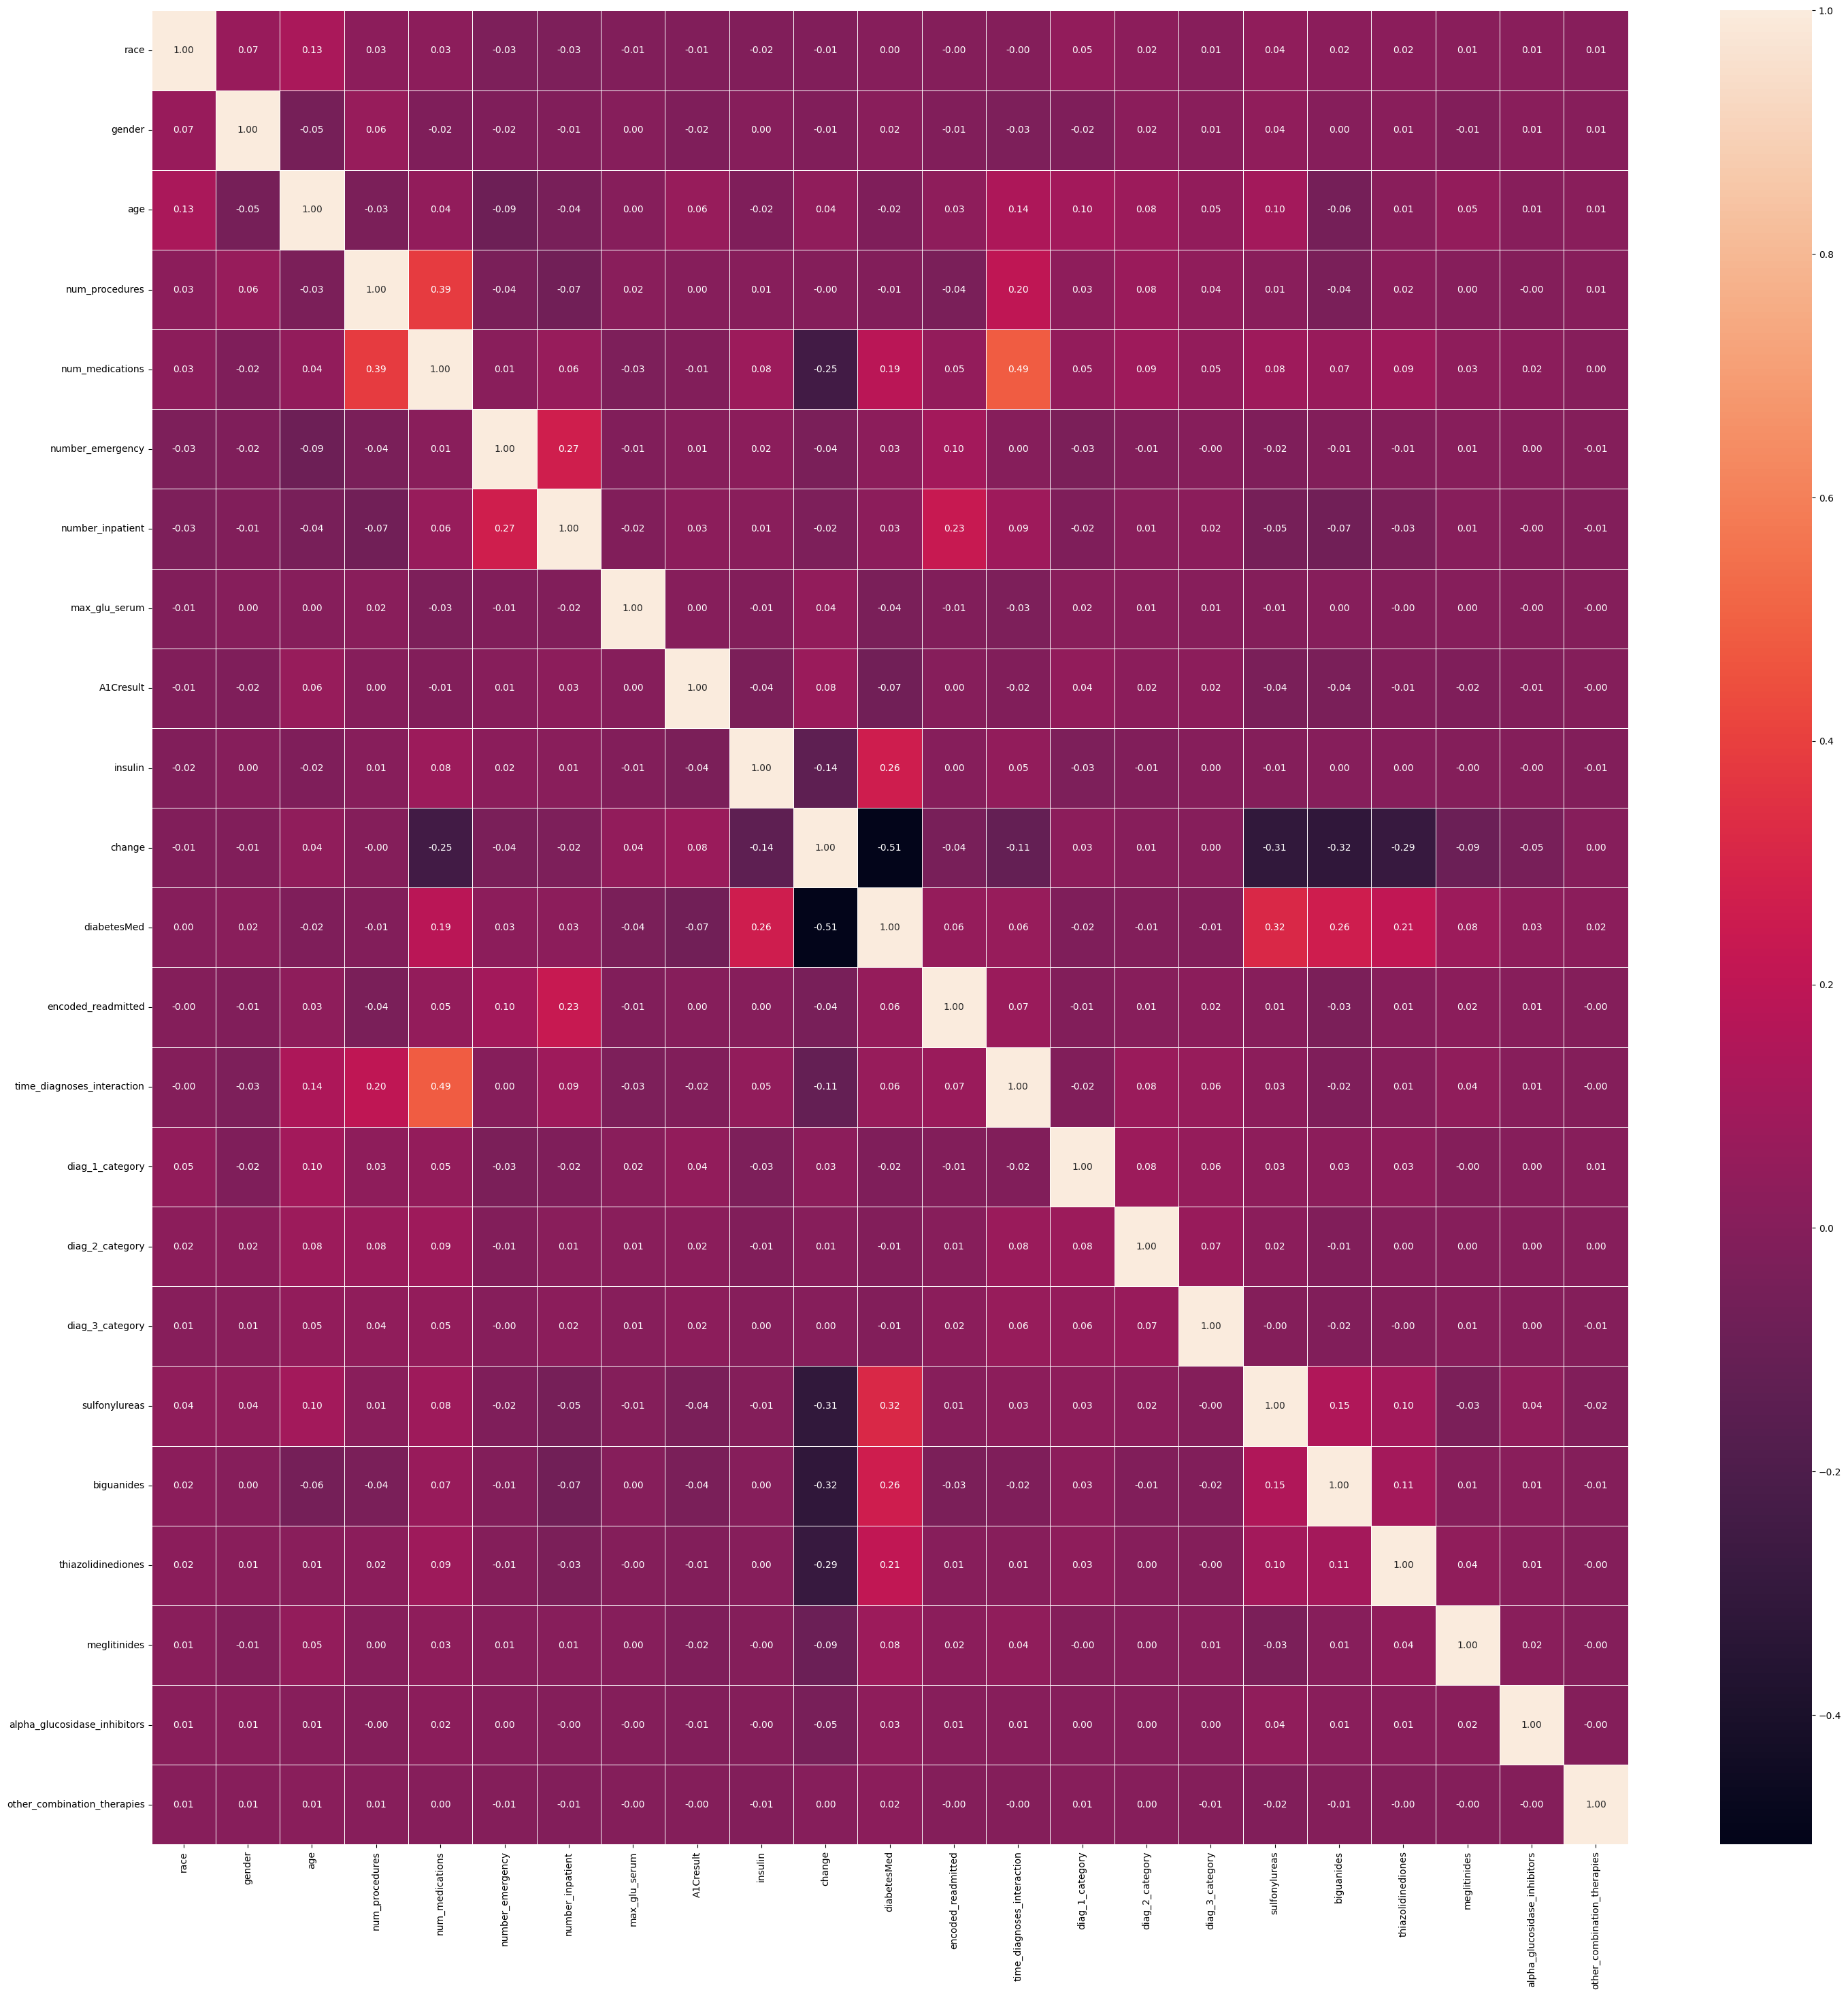

In [33]:
# For columns with multiple categories, use LabelEncoder
encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    if data[col].dtype == 'object':  # Check if the column is categorical
        data[col] = encoder.fit_transform(data[col])

# Plot the heatmap
f, ax = plt.subplots(figsize=(35, 35))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.2f', ax=ax)

plt.show()

In [34]:
from scipy import stats
# Check for outliers using Z-scores
def z_score_outliers(data):
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
    outliers_z = (z_scores > 3)  # Define outliers as z-scores greater than 3 or less than -3
    return outliers_z

# Check for outliers using IQR
def iqr_outliers(data):
    outliers_iqr = pd.DataFrame(index=data.index)
    
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifying outliers
        outliers_iqr[column] = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    return outliers_iqr

# Identify outliers using Z-scores
z_outliers = z_score_outliers(data)
outlier_columns_z = data.select_dtypes(include=[np.number]).columns[np.any(z_outliers, axis=0)]

# Identify outliers using IQR
iqr_outliers = iqr_outliers(data)
outlier_columns_iqr = iqr_outliers.columns[iqr_outliers.any()]

# Output the column names with outliers based on both methods
print("Columns with outliers based on Z-scores:")
print(outlier_columns_z)

print("\nColumns with outliers based on IQR:")
print(outlier_columns_iqr)

Columns with outliers based on Z-scores:
Index(['gender', 'age', 'num_medications', 'number_emergency',
       'number_inpatient', 'max_glu_serum', 'A1Cresult',
       'time_diagnoses_interaction', 'sulfonylureas', 'biguanides',
       'thiazolidinediones', 'meglitinides', 'alpha_glucosidase_inhibitors',
       'other_combination_therapies'],
      dtype='object')

Columns with outliers based on IQR:
Index(['race', 'age', 'num_procedures', 'num_medications', 'number_emergency',
       'number_inpatient', 'max_glu_serum', 'A1Cresult', 'diabetesMed',
       'time_diagnoses_interaction', 'diag_1_category', 'biguanides',
       'thiazolidinediones', 'meglitinides', 'alpha_glucosidase_inhibitors',
       'other_combination_therapies'],
      dtype='object')


In [35]:
# Function to cap outliers using IQR bounds
def cap_outliers_iqr(data):
    for column in data.select_dtypes(include=[np.number]).columns:
        # Calculate IQR for the column
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate bounds for capping
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the values: any value below lower_bound is set to lower_bound, any value above upper_bound is set to upper_bound
        data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    
    return data

# Apply capping to handle outliers
data_capped = cap_outliers_iqr(data)

# Verify the capping operation
print(data_capped.describe())

           race         gender            age  num_procedures  \
count  101766.0  101766.000000  101766.000000   101766.000000   
mean        2.0       0.462443      61.066564        1.291050   
std         0.0       0.498649      15.640735        1.581884   
min         2.0       0.000000      20.000000        0.000000   
25%         2.0       0.000000      50.000000        0.000000   
50%         2.0       0.000000      60.000000        1.000000   
75%         2.0       1.000000      70.000000        2.000000   
max         2.0       2.000000      90.000000        5.000000   

       num_medications  number_emergency  number_inpatient  max_glu_serum  \
count    101766.000000          101766.0     101766.000000       101766.0   
mean          0.185106               0.0          0.513683            2.0   
std           0.092458               0.0          0.811334            0.0   
min           0.000000               0.0          0.000000            2.0   
25%           0.112500       

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



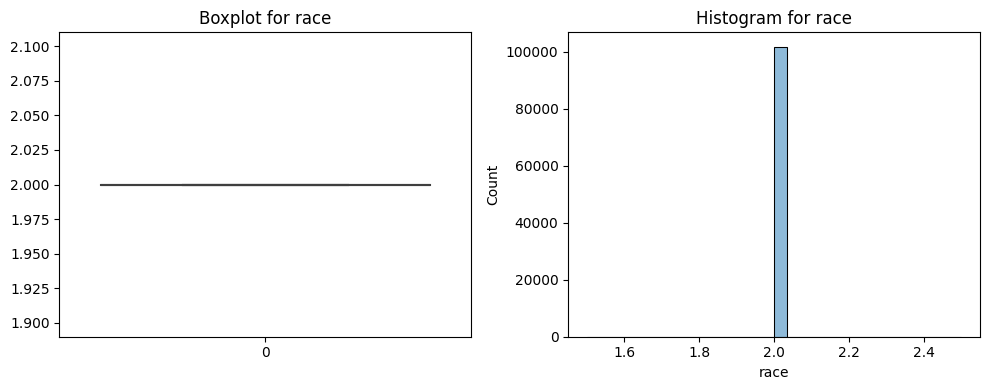

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



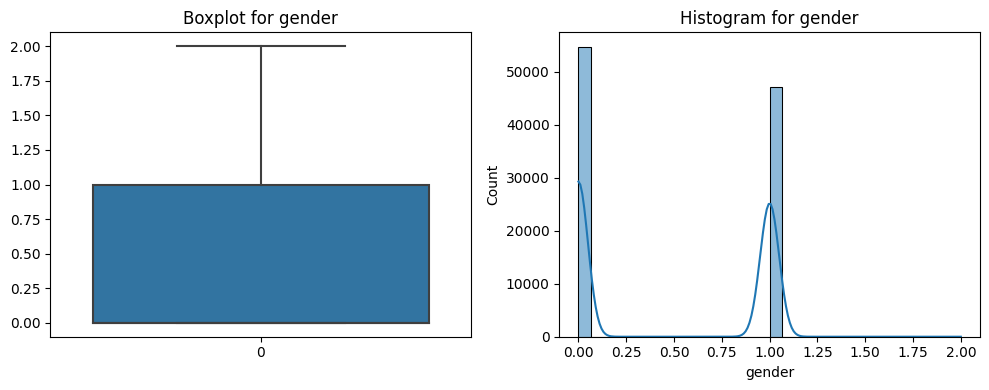

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



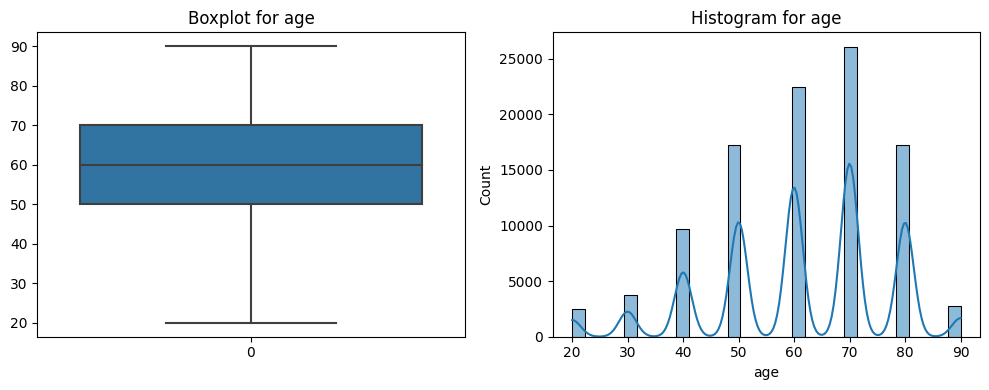

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



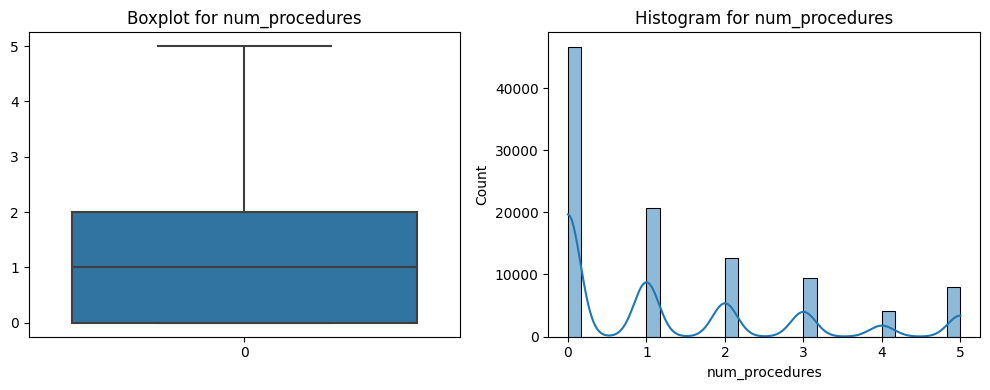

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



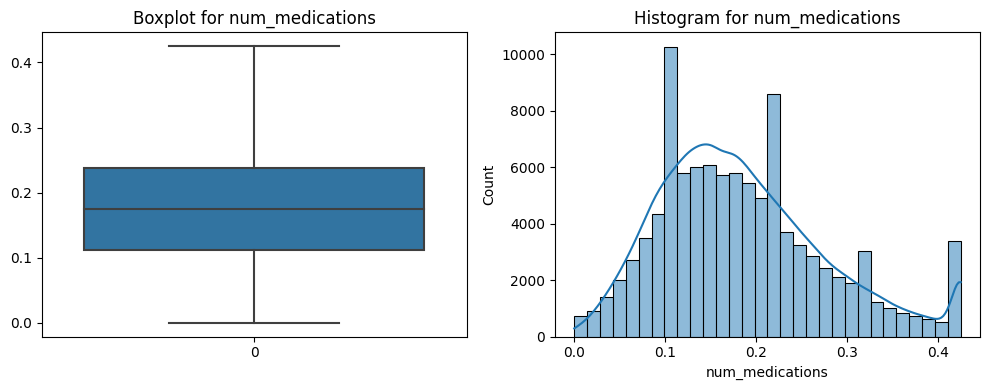

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



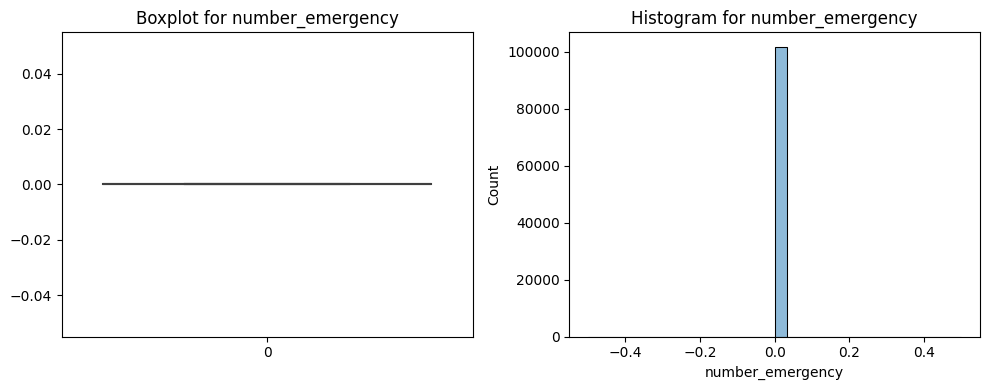

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



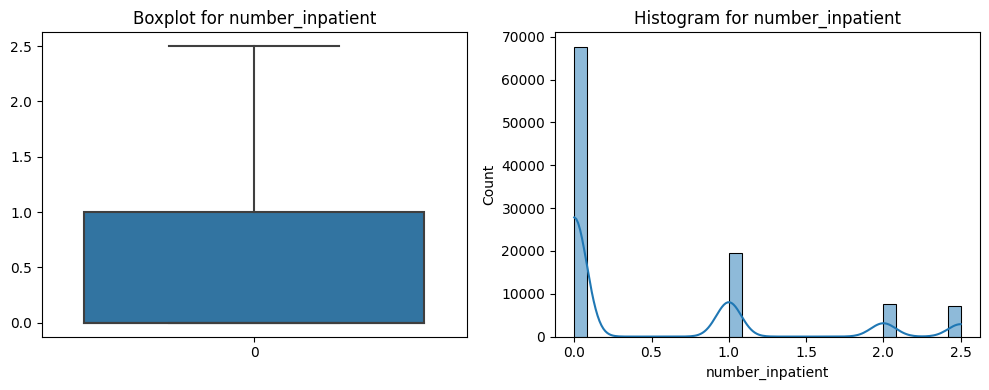

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



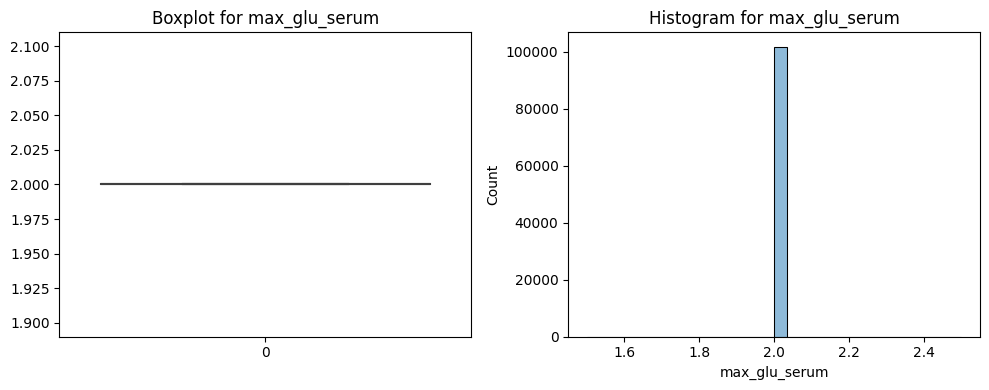

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



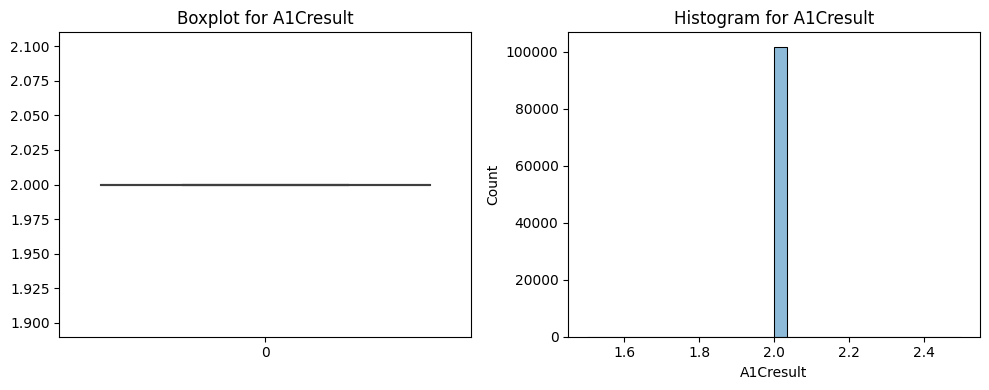

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



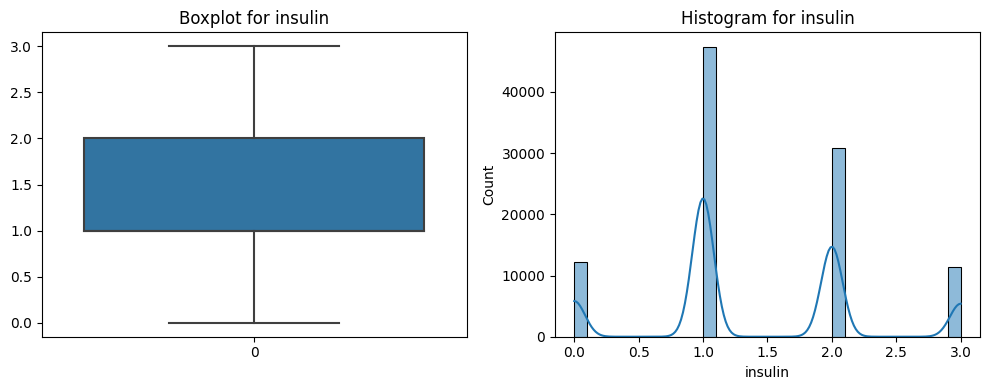

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



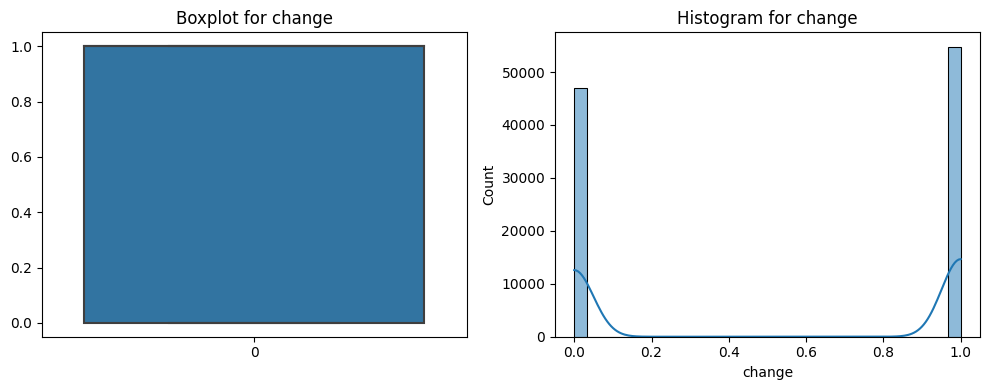

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



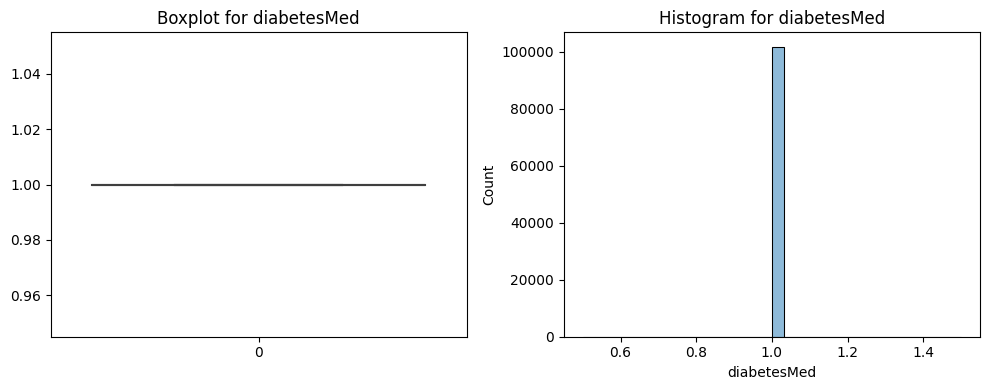

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



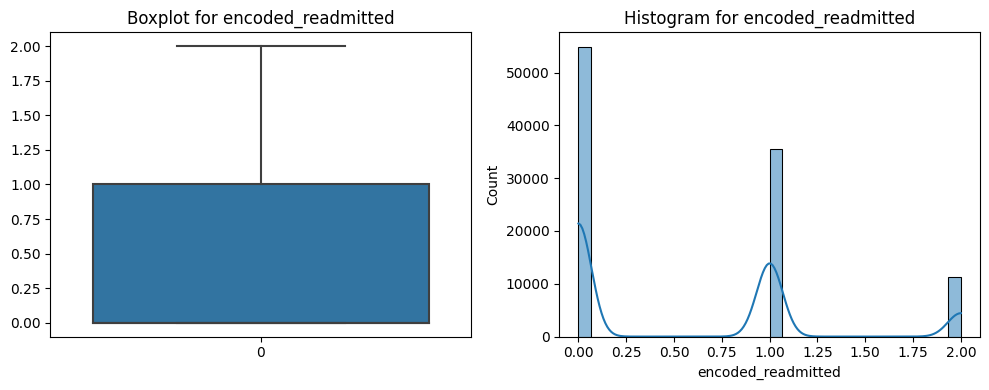

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



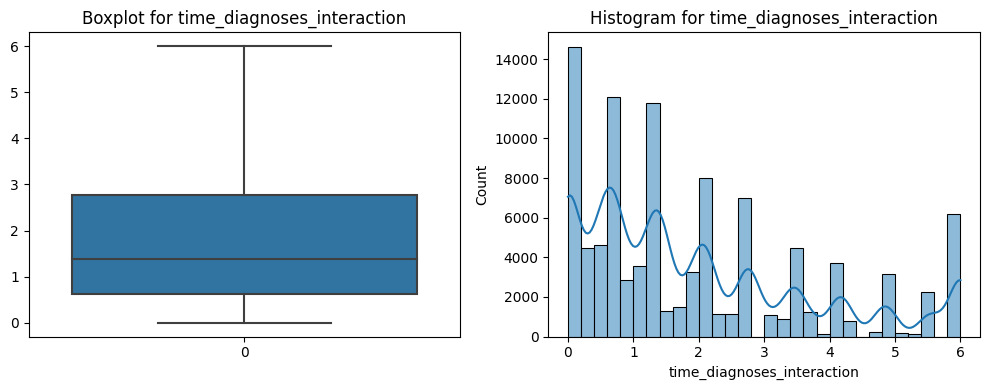

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



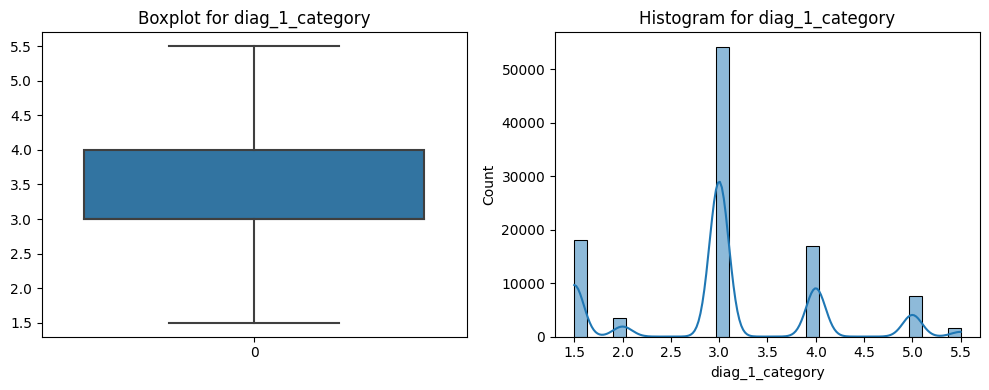

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



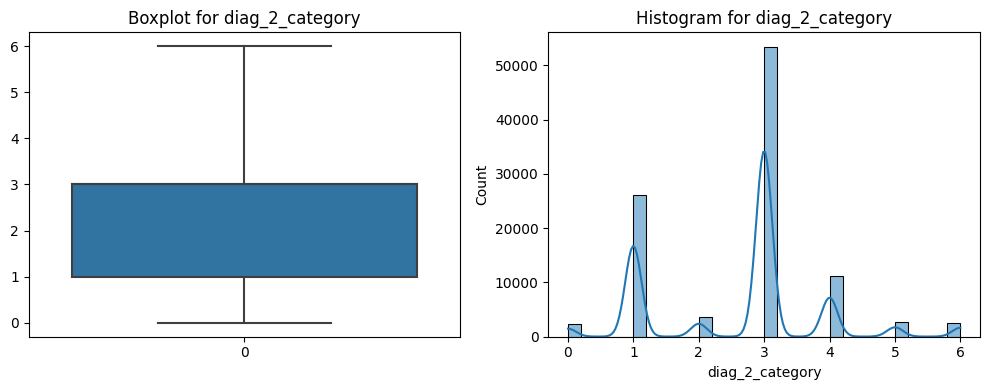

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



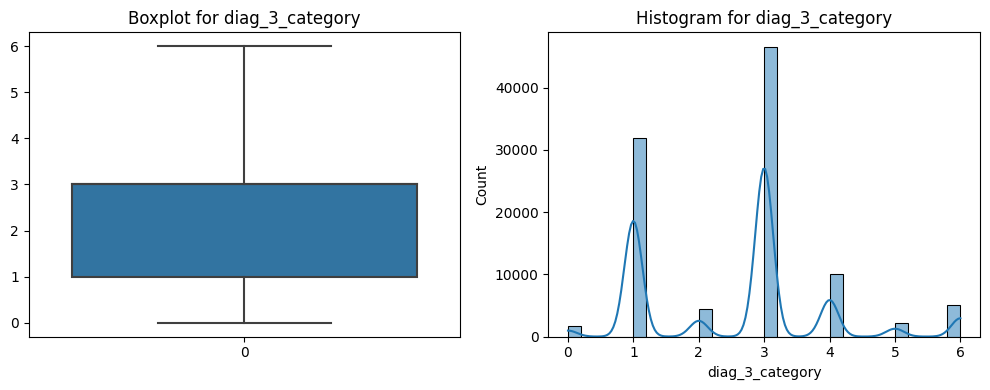

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



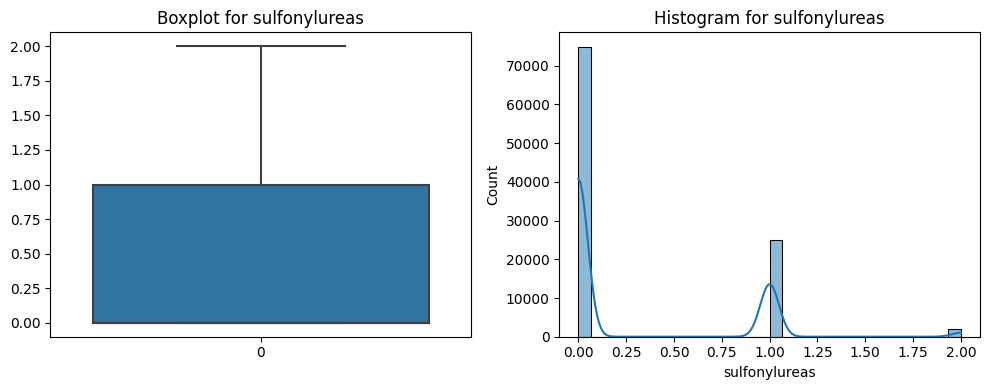

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



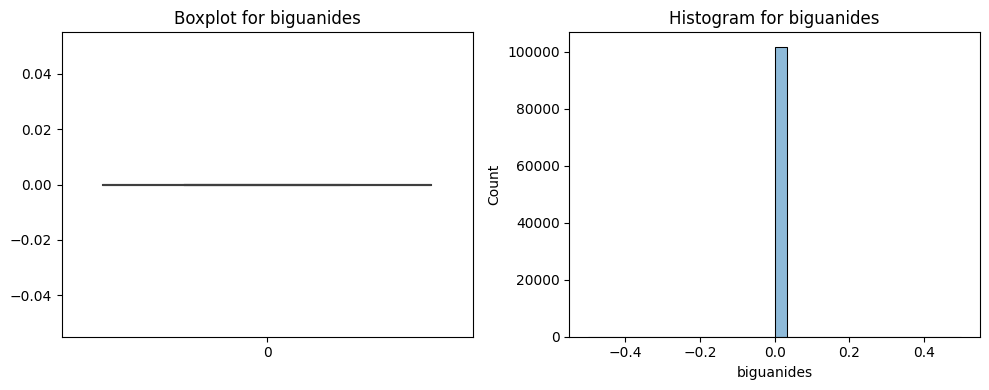

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



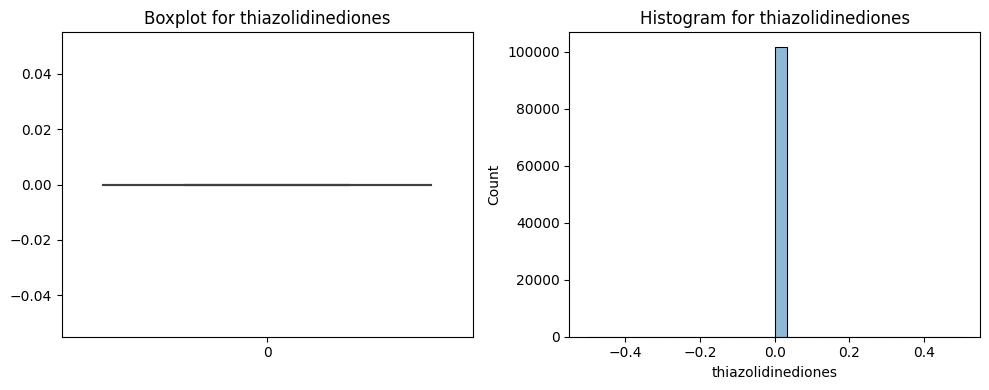

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



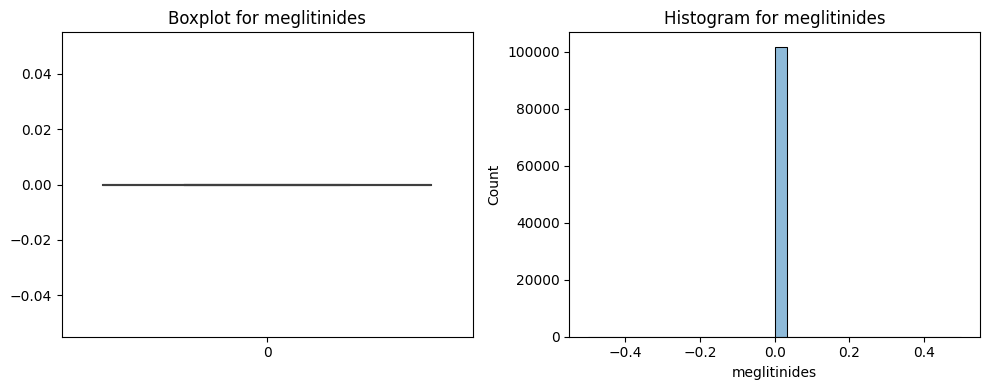

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



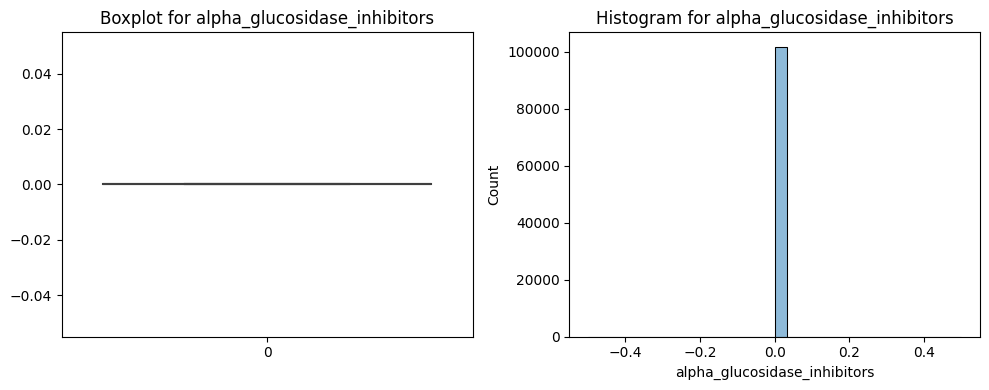

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



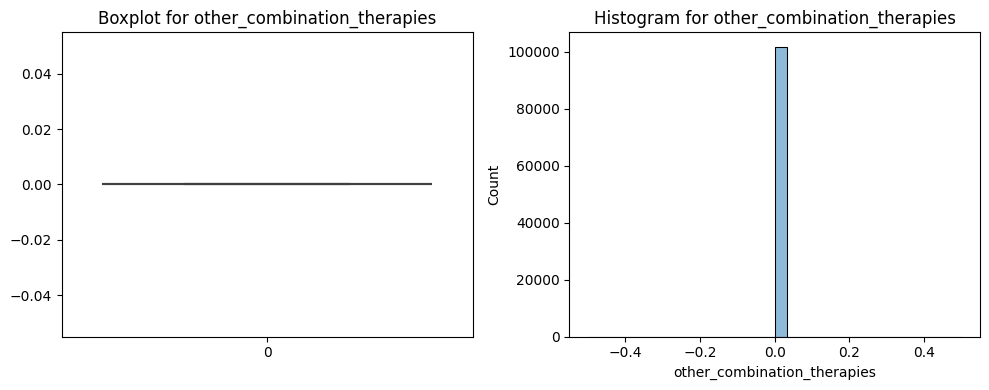

In [36]:
# Visualize outliers in the identified columns using Boxplots and Histograms
for column in data.select_dtypes(include=[np.number]).columns:
    # Boxplot for the column
    plt.figure(figsize=(10, 4))

    # Boxplot for visualizing outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(data[column])
    plt.title(f'Boxplot for {column}')
    
    # Histogram to visualize the distribution of the column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Histogram for {column}')
    
    plt.tight_layout()
    plt.show()

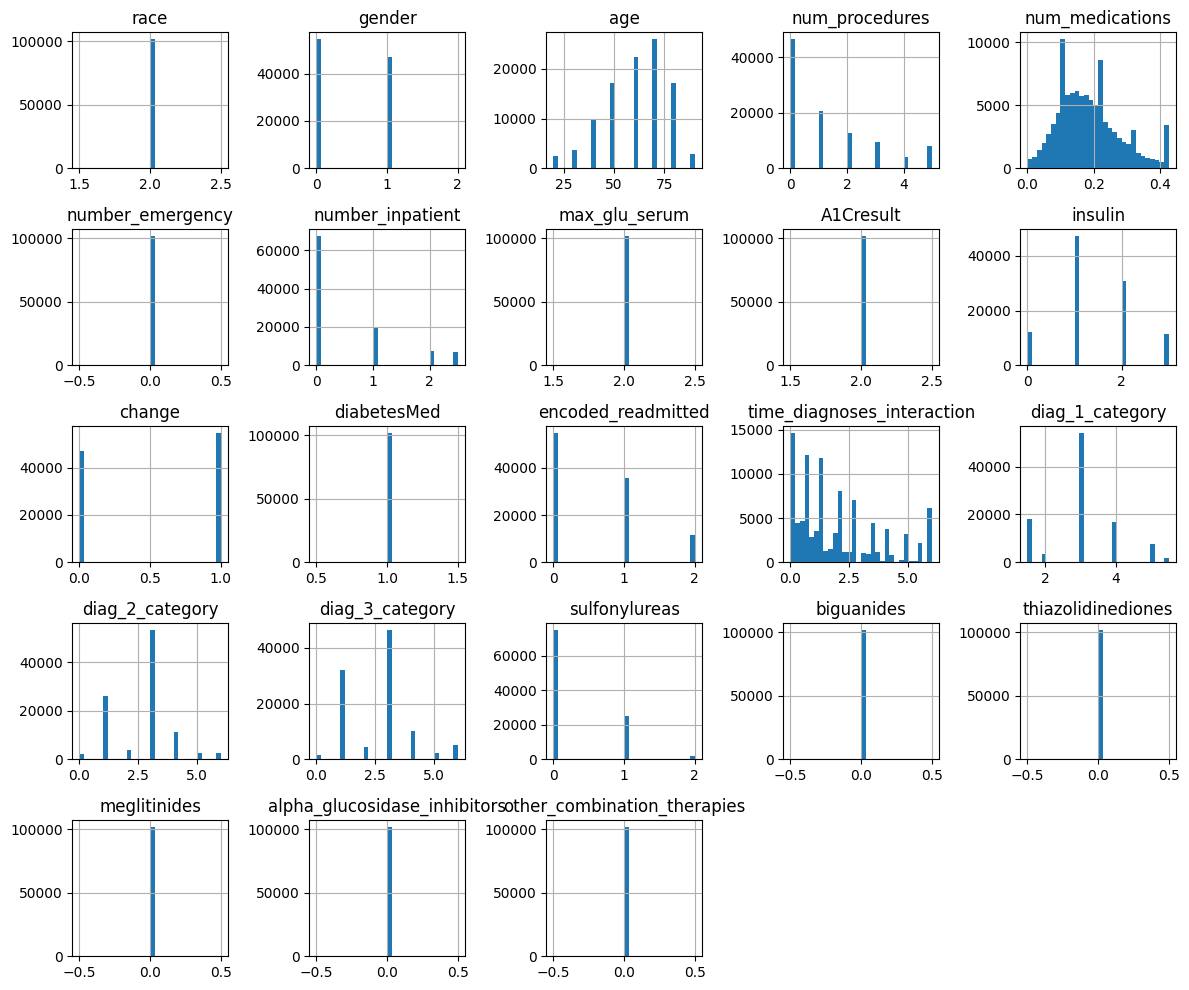

In [37]:
# Histograms for numerical variables
data.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

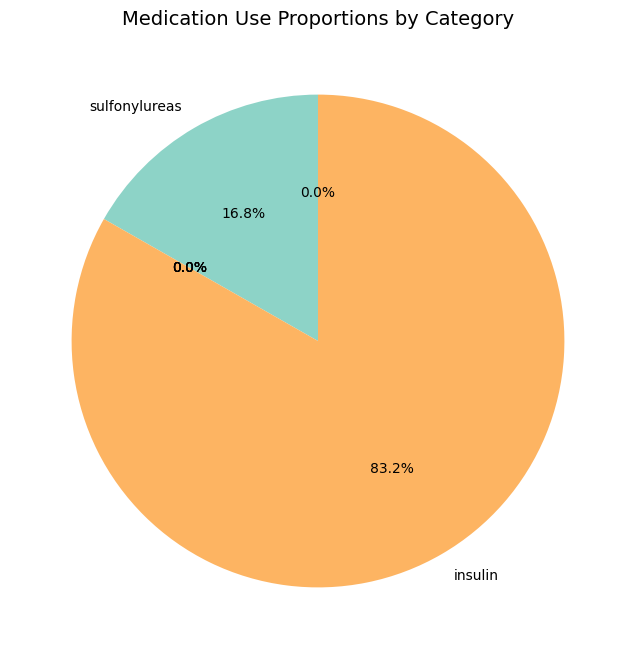

In [38]:
mymedication_columns = [
    'sulfonylureas', 
    'biguanides', 
    'thiazolidinediones', 
    'meglitinides', 
    'alpha_glucosidase_inhibitors', 
    'insulin', 
    'other_combination_therapies'
]
# Pie chart to show the proportion of patients in each medication category
category_counts = data[mymedication_columns].sum()

plt.figure(figsize=(8,8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(category_counts)))
plt.title('Medication Use Proportions by Category', fontsize=14)
plt.ylabel('')
plt.show()

In [39]:
fig_readmission = px.pie(data, names='gender', title='gender')
fig_readmission.show()

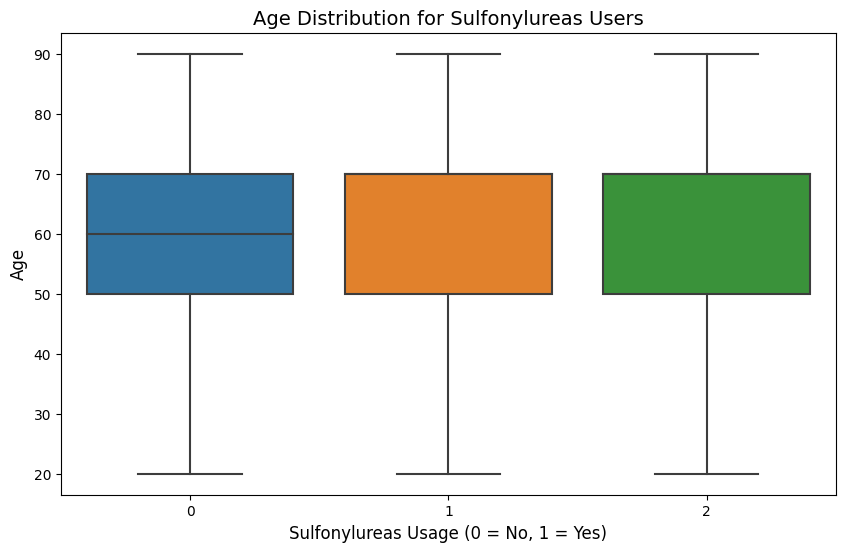

In [40]:
# Boxplot  for age distribution across medication categories
plt.figure(figsize=(10,6))
sns.boxplot(x='sulfonylureas', y='age', data=data)  # Replace 'sulfonylureas' with the relevant medication category
plt.title('Age Distribution for Sulfonylureas Users', fontsize=14)
plt.xlabel('Sulfonylureas Usage (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

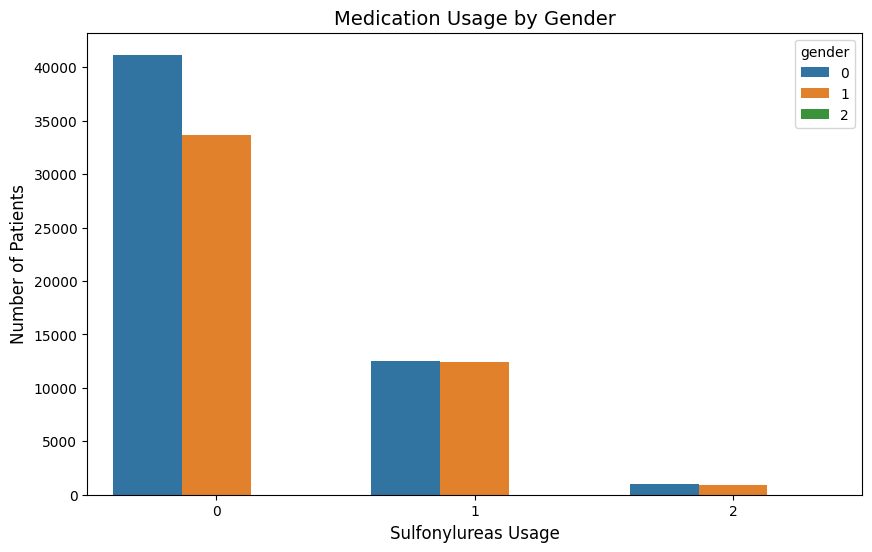

In [41]:
# Medication usage by gender (replace 'gender' with your column)
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='sulfonylureas', hue='gender')  # Replace with appropriate column names
plt.title('Medication Usage by Gender', fontsize=14)
plt.xlabel('Sulfonylureas Usage', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()


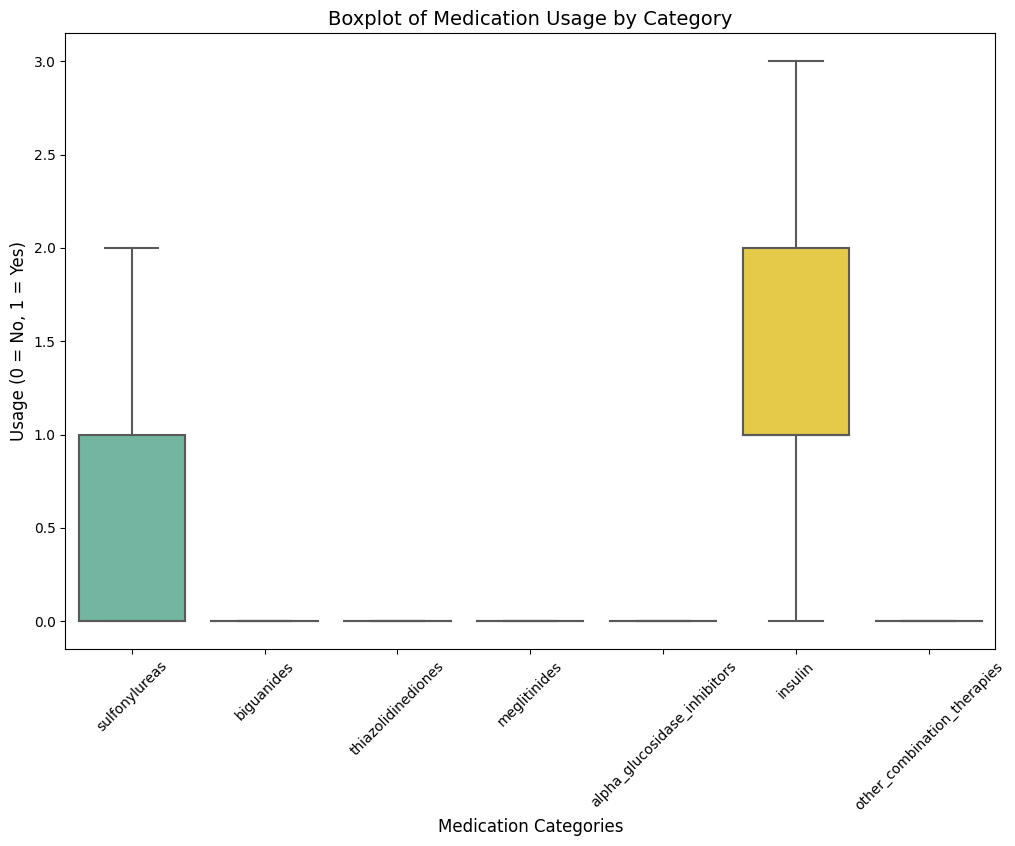

In [42]:
# Create a boxplot for all medication categories
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[mymedication_columns], palette='Set2')

# Set plot titles and labels
plt.title('Boxplot of Medication Usage by Category', fontsize=14)
plt.xlabel('Medication Categories', fontsize=12)
plt.ylabel('Usage (0 = No, 1 = Yes)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

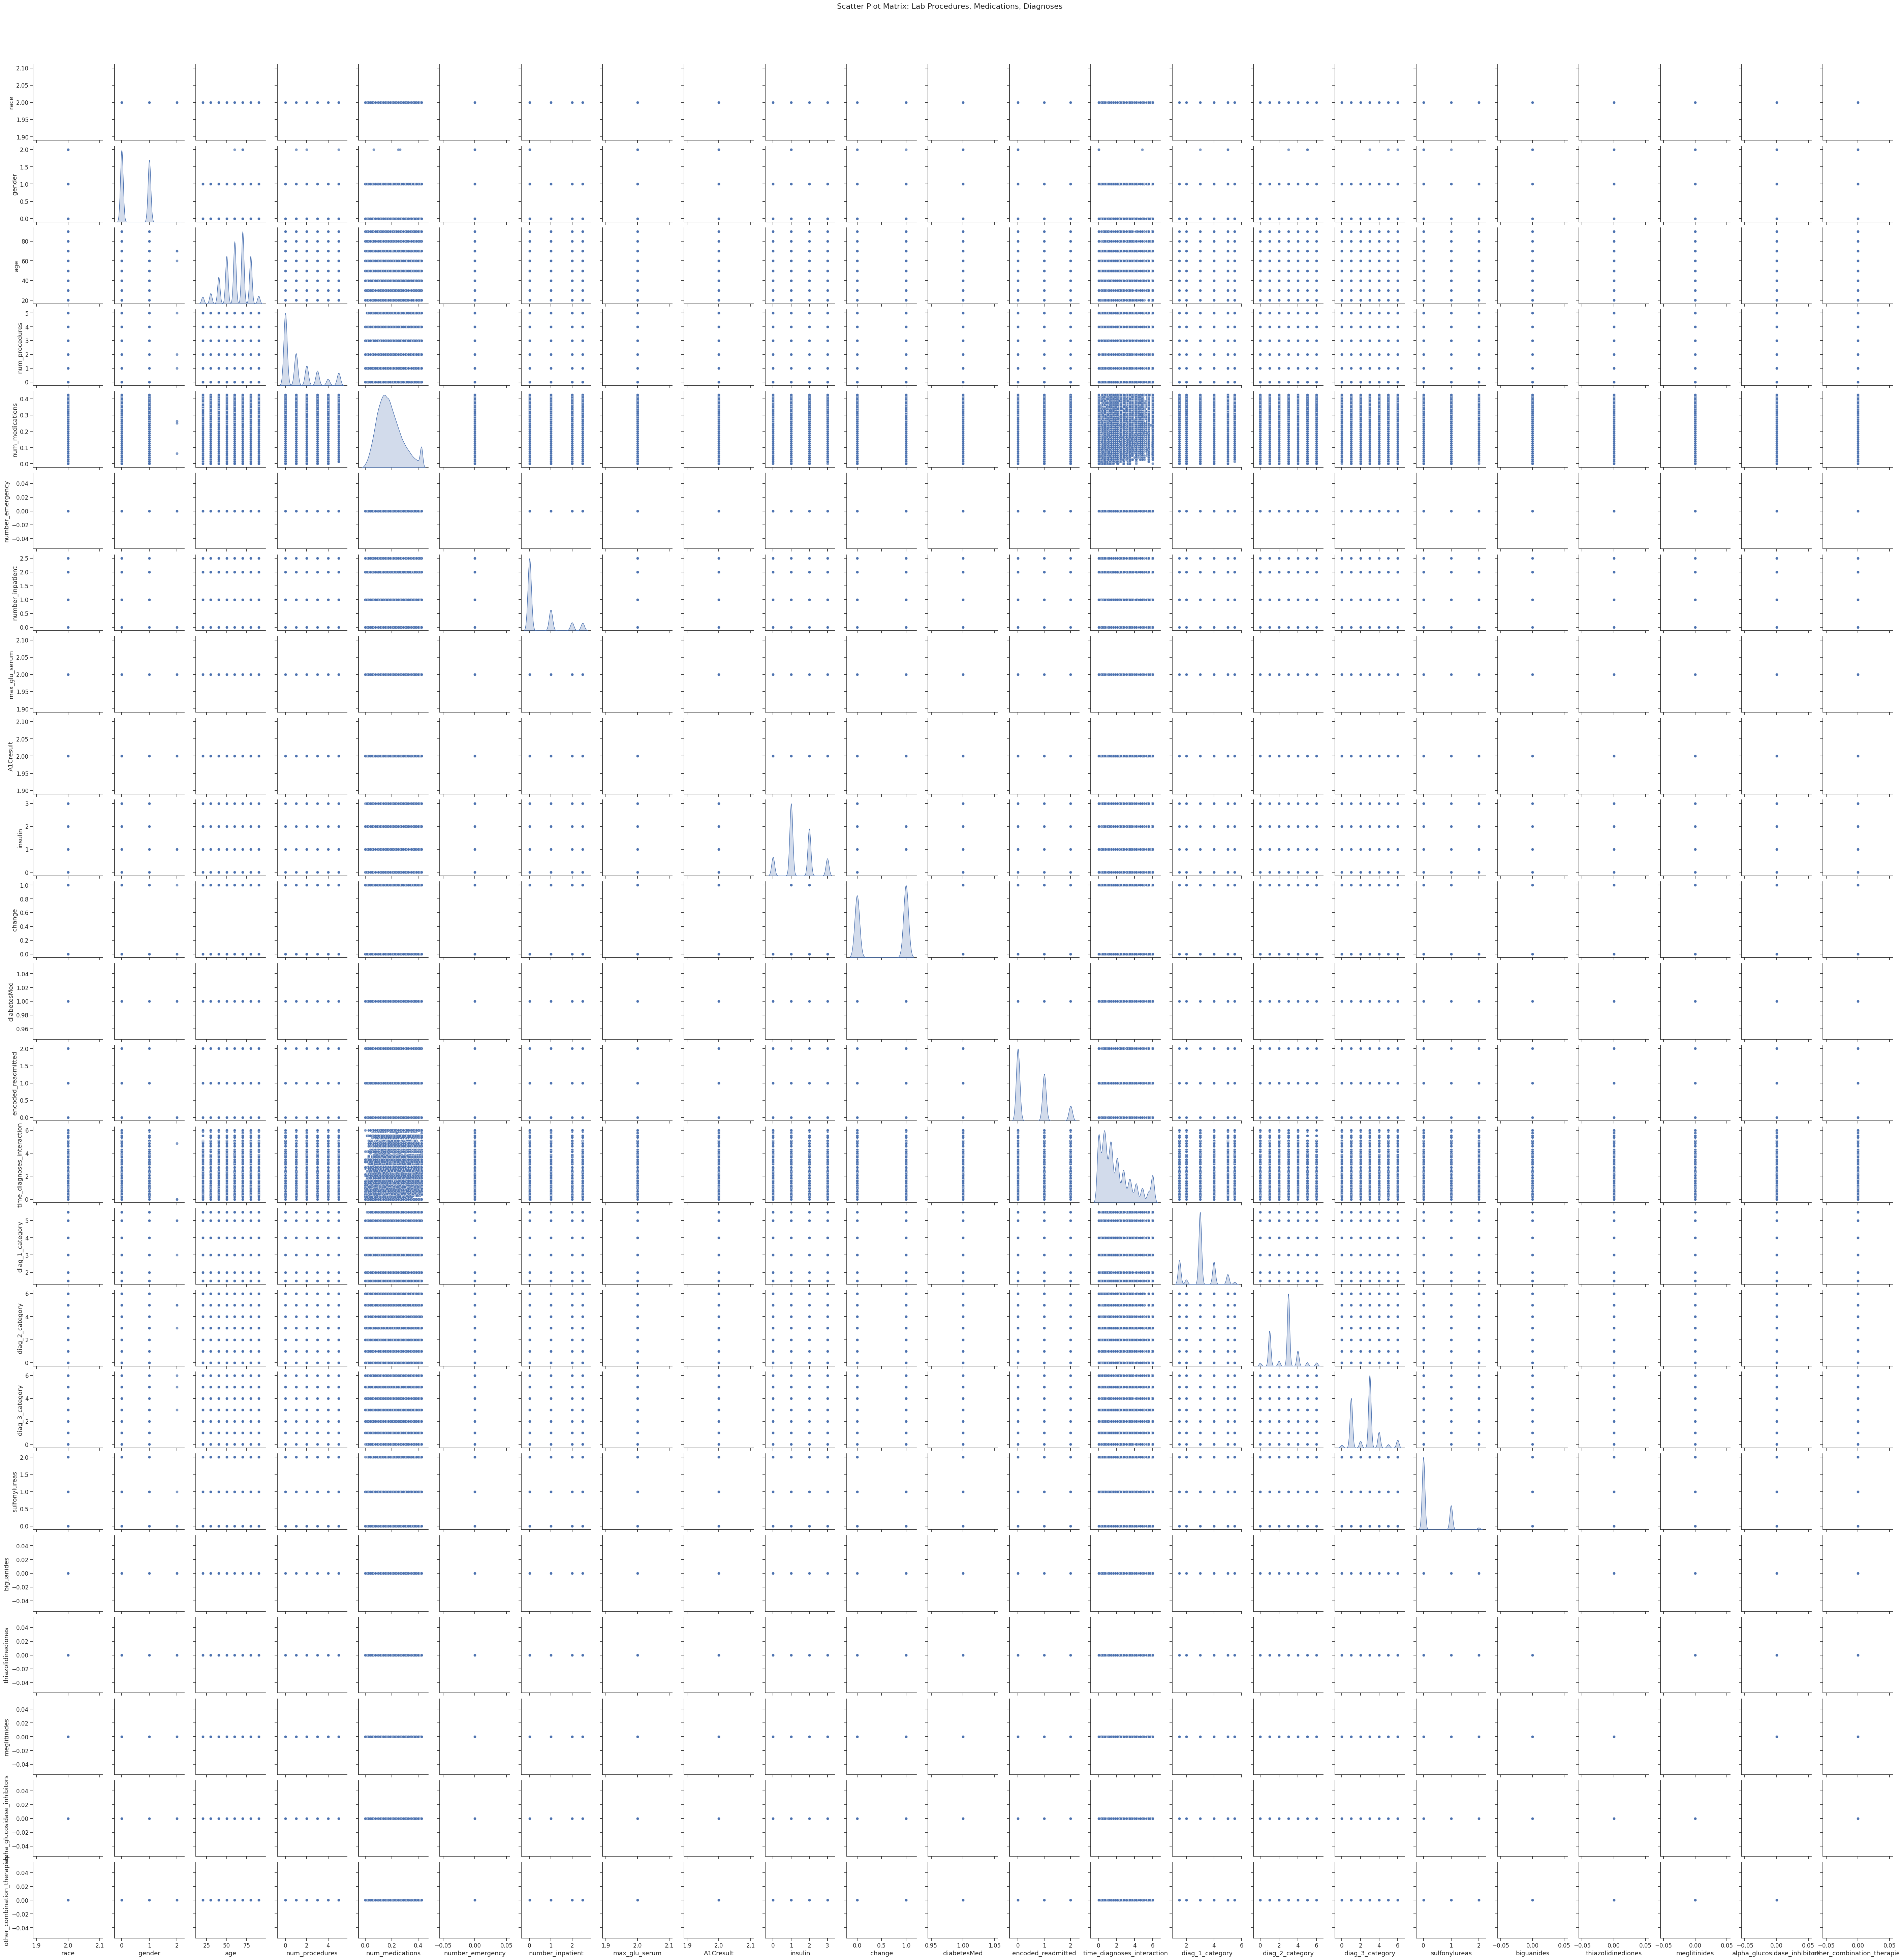

In [43]:
df = pd.DataFrame(data)

# Create the scatter plot matrix
sns.set(style="ticks", font_scale=1.1)
pair_plot = sns.pairplot(df, diag_kind="kde", plot_kws={'alpha': 0.7})

# Add a title
pair_plot.fig.suptitle("Scatter Plot Matrix: Lab Procedures, Medications, Diagnoses",
                       y=1.02, fontsize=16)

# Show the plot
plt.show()

In [44]:
data.shape

(101766, 23)

In [45]:
data.to_csv('DataPreprocessing.csv', index=False)

# Conclusion:
In this data analysis, we explored various aspects of the dataset to uncover patterns and relationships between key variables. Based on the visualizations and analysis, we can draw the following conclusions:

### Key Trends:
- The plots clearly show significant trends in time diagnose interaction and the number of medications. This suggests that as hospital stays increase the number of medications as well , which could indicate patients with more complex conditions that need medications may require longer hospitalizations.
  
## Important Relationships:
- The interaction plot between (num_procedures and num_medications),(time diagnoses interaction and num_inpatiant), (time diagnoses interaction and num_emergency) and (num_emergency and encoded_readmitted)

## Outliers and Anomalies:
- From the plots, we observed
  [Columns with outliers based on Z-scores:['gender', 'age', 'num_medications', 'number_emergency','number_inpatient', 'max_glu_serum', 'A1Cresult', 'time_diagnoses_interaction', 'sulfonylureas', 'biguanides', 'thiazolidinediones', 'meglitinides', 'alpha_glucosidase_inhibitors', 'other_combination_therapies']]
  [Columns with outliers based on IQR:['race', 'age', 'num_procedures', 'num_medications', 'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult', 'diabetesMed', 'time_diagnoses_interaction', 'diag_1_category', 'biguanides', 'thiazolidinediones', 'meglitinides', 'alpha_glucosidase_inhibitors', 'other_combination_therapies']. These outliers could indicate data entry errors, or unusual patient circumstances.

## Correlations:
- We also identified notable correlations between(num_procedures and num_medications), (num_medications and time diagnoses interaction), (number_emergency and number_inpatient), (number_inpatient and readmitted), (inslin and diabetesMed) proportional.
 (change and (num_medications,diabetesMed,biguanides,thiazolidinediones,sulfonylureas)) non-proportional.
- This correlation suggests that as insulin and medications increase as readmitted increases. and as change increases the medications decrease.

## Splitting Data for Training and Testing

In [ ]:
# 4. Train-Test Split: Split data into train and test sets
X = data.drop(columns=['encoded_readmitted'])  # Features
y = data['encoded_readmitted']  # Target

# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split and check the shape
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Data Analysis Report: Diabetic Dataset

## 1. Introduction
The dataset under analysis contains medical data from diabetic patients, including various health metrics and demographic information. The objective of this analysis is to explore the dataset comprehensively, identify significant patterns, understand the relationships between key features, and provide actionable insights that can assist healthcare professionals in improving patient care and predicting readmission risks.

### Goals:
- Examine the distribution of key features such as age, lab procedures, and readmission status.
- Identify any potential correlations between variables, especially those that may be useful for predicting readmission.
- Perform data cleaning and preprocessing to prepare the dataset for predictive modeling.

---

## 2. Data Preprocessing

Before any in-depth analysis was carried out, several preprocessing steps were performed to ensure the dataset’s accuracy and completeness.

### Handling Missing Values:

Several columns in the dataset contained missing values, and the following strategies were applied to handle them:
- **max_glu_serum** and **A1Cresult**: Missing values were replaced with 'No Test' to indicate that no test was performed for these features.
- **race, payer_code, medical_specialty, diag_1, diag_2, diag_3**: These categorical columns had missing values, which were filled with the mode (most frequent value) of each respective column.
- **weight**: This column contained a large proportion of missing data. Given its potential irrelevance to the analysis, it was dropped from the dataset.

### Data Type Conversion:
Some columns, such as **age**, initially contained string values (e.g., age ranges like '[0-10)'). These values were converted into numerical values by extracting the lower bound of each range. In addition, categorical variables like **gender** and **race** were converted to the 'category' data type to reduce memory usage and optimize processing.

---

## 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) was performed to uncover patterns and relationships within the data.

### 3.1. Univariate Analysis

In univariate analysis, the distribution of individual features was examined:

- **Age Distribution**: The age distribution of patients was found to have a concentration between the ages of 50 and 70, with a few cases at the younger and older ends. This indicates that the majority of patients in the dataset are older adults, likely representing a typical diabetes population.
  
- **Number of Lab Procedures**: This feature displayed a right-skewed distribution, meaning the majority of patients had fewer lab procedures, with a few patients undergoing a significantly higher number of procedures. This suggests that some patients had more severe or complex medical conditions requiring additional testing.

- **Readmission Status**: The distribution of readmission status revealed that most patients were not readmitted (NO), followed by a smaller group readmitted within 30 days (<30), and a very few readmitted after more than 30 days (>30).

### 3.2. Bivariate Analysis

Bivariate analysis was conducted to assess the relationships between pairs of features:

- **Age vs Readmission**: Age did not have a strong influence on the likelihood of readmission. There was no significant difference in readmission status between different age groups, which suggests that age may not be a critical factor in predicting readmission.

- **Number of Lab Procedures vs Time in Hospital**: A positive correlation was observed between the number of lab procedures and the time spent in the hospital. Patients who underwent more lab procedures typically spent more time in the hospital, suggesting a relationship between the complexity of care and the length of stay.

### 3.3. Correlation Analysis

A heatmap was generated to visualize the correlations between numerical variables. The analysis showed that the **num_lab_procedures** feature had a positive correlation with **time_in_hospital**, indicating that patients who underwent more lab tests tended to stay in the hospital for longer periods.

### 3.4. Multivariate Analysis

Pairplots were used to examine relationships between multiple numerical features. The pairplot revealed interconnectedness between **age**, **num_lab_procedures**, and **time_in_hospital**. Patients who had more lab procedures generally spent more time in the hospital, which suggests that more complex medical cases are associated with longer hospital stays.

---

## 4. Key Insights

Based on the findings from the EDA, several key insights were identified:

- **Age and Readmission**: There is no strong correlation between age and readmission status, suggesting that age is not a major predictor of whether a patient will be readmitted. Other factors may play a more significant role.

- **Lab Procedures and Hospital Stay**: A positive correlation was observed between the number of lab procedures and the length of hospital stay, highlighting that patients with more complex medical conditions may require more tests and longer stays in the hospital.

- **Data Quality**: The dataset was thoroughly cleaned, with missing values addressed appropriately and irrelevant columns like **weight** removed. The transformation of the **age** feature and categorical variable handling allowed for a more effective analysis.

---

## 5. Data Preparation for Modeling

Several key transformations were made to prepare the data for predictive modeling:

### 5.1. Feature Engineering
- A new feature, **age_group**, was created by binning the **age** column into categories such as '0-20', '20-40', '40-60', etc. This transformation helps simplify the dataset and may improve model performance by grouping age ranges with similar characteristics.

### 5.2. Scaling
- Numerical features were scaled using **Min-Max scaling** to ensure all numerical features are within the same range, which is important for many machine learning algorithms, especially those that rely on distance metrics, such as k-NN or SVM.

### 5.3. One-Hot Encoding
- Categorical variables such as **gender** and **race** were one-hot encoded to convert them into numerical representations suitable for machine learning models.

### 5.4. Splitting Data
- The dataset was then split into training and testing sets, ensuring that we can evaluate the model's performance on unseen data after training.

---

## 6. Conclusion

The data analysis revealed several key insights that could assist in future modeling and predictions:

1. **Readmission Prediction**: Age did not significantly influence readmission status, but other factors, such as lab procedures and hospital stay, could play a crucial role in predicting readmission risk.
   
2. **Lab Procedures and Hospital Stay**: A strong correlation between the number of lab procedures and hospital stay was found, suggesting that more extensive medical care may be required for patients who undergo more tests.

3. **Data Quality**: The data was successfully preprocessed, with missing values handled, irrelevant columns dropped, and categorical features properly encoded, allowing for a more robust analysis and improved prediction capabilities.

### Next Steps:
Future work will involve training machine learning models, such as **logistic regression**, **decision trees**, or **random forests**, to predict readmission based on the features identified in this analysis. Evaluating these models will provide further insights into patient risk factors for readmission, which could help healthcare providers in making better decisions.
